<a href="https://colab.research.google.com/github/RajatSharma-26/ai-sales-forecaster/blob/main/AISF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sales-forecasting' dataset.
Path to dataset files: /kaggle/input/sales-forecasting


In [ ]:
import pandas as pd
import os

def load_and_clean_data(file_path: str, date_column: str) -> pd.DataFrame:
    """
    Loads a dataset from a CSV file, cleans it, and handles date formatting.

    Args:
        file_path (str): The full path to the CSV file.
        date_column (str): The name of the column containing dates.

    Returns:
        pd.DataFrame: A cleaned and preprocessed pandas DataFrame, or None if loading fails.
    """
    # --- 1. Load the dataset with robust error handling ---
    try:
        df = pd.read_csv(file_path)
        print(f"Dataset loaded successfully from {os.path.basename(file_path)}.")
        print("-" * 30)
    except FileNotFoundError:
        print(f"Error: The file was not found at {file_path}")
        return None

    # --- 2. Handle Missing Values Efficiently ---
    print("Starting data cleaning process...")
    # Separate columns by data type
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Impute numeric columns with the median
    for col in numeric_cols:
        if df[col].isnull().any():
            median_val = df[col].median()
            # Use the recommended syntax to avoid the FutureWarning
            df[col] = df[col].fillna(median_val)
            print(f"Filled missing numeric values in '{col}' with median: {median_val}")

    # Impute categorical columns with the mode
    for col in categorical_cols:
        if df[col].isnull().any():
            mode_val = df[col].mode()[0]
            # Use the recommended syntax to avoid the FutureWarning
            df[col] = df[col].fillna(mode_val)
            print(f"Filled missing categorical values in '{col}' with mode: {mode_val}")

    print("Missing value handling complete.")
    print("-" * 30)

    # --- 3. Format the Date Column Robustly ---
    print("Formatting date column...")
    if date_column in df.columns:
        # errors='coerce' will turn any unparseable dates into NaT (Not a Time)
        original_nulls = df[date_column].isnull().sum()
        df[date_column] = pd.to_datetime(df[date_column], dayfirst=True, errors='coerce')
        new_nulls = df[date_column].isnull().sum()

        if new_nulls > original_nulls:
             print(f"Warning: Some dates in '{date_column}' could not be parsed and were set to null.")
        # We can handle any newly created nulls if necessary
        if df[date_column].isnull().any():
             df.dropna(subset=[date_column], inplace=True)
             print(f"Dropped rows with unparseable dates in '{date_column}'.")

        print(f"Column '{date_column}' successfully converted to datetime format.")
    else:
        print(f"Warning: Date column '{date_column}' not found in the DataFrame.")
    print("-" * 30)

    return df

if __name__ == "__main__":
    # --- Configuration ---
    # This is where you set your file path and column names
    # Using the Kaggle Superstore dataset as an example
    DATASET_PATH = "/kaggle/input/sales-forecasting"
    FILE_NAME = "train.csv" # Or "Superstore.csv" depending on the Kaggle dataset
    DATE_COLUMN_NAME = 'Order Date'

    # Construct the full file path
    full_path = os.path.join(DATASET_PATH, FILE_NAME)

    # --- Main Execution ---
    cleaned_df = load_and_clean_data(file_path=full_path, date_column=DATE_COLUMN_NAME)

    if cleaned_df is not None:
        print("\n--- Cleaned DataFrame Summary ---")
        print("\nCleaned DataFrame head:")
        # In a real script, you might use display(cleaned_df.head()),
        # but print() is more universal.
        print(cleaned_df.head())

        print("\nCleaned DataFrame info:")
        cleaned_df.info()

Dataset loaded successfully from train.csv.
------------------------------
Starting data cleaning process...
Filled missing numeric values in 'Postal Code' with median: 58103.0
Missing value handling complete.
------------------------------
Formatting date column...
Column 'Order Date' successfully converted to datetime format.
------------------------------

--- Cleaned DataFrame Summary ---

Cleaned DataFrame head:
   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   


--- Analyzing Sales by Region ---


/tmp/ipython-input-3009317263.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='plasma')


Generated and saved 'sales_by_region.png'


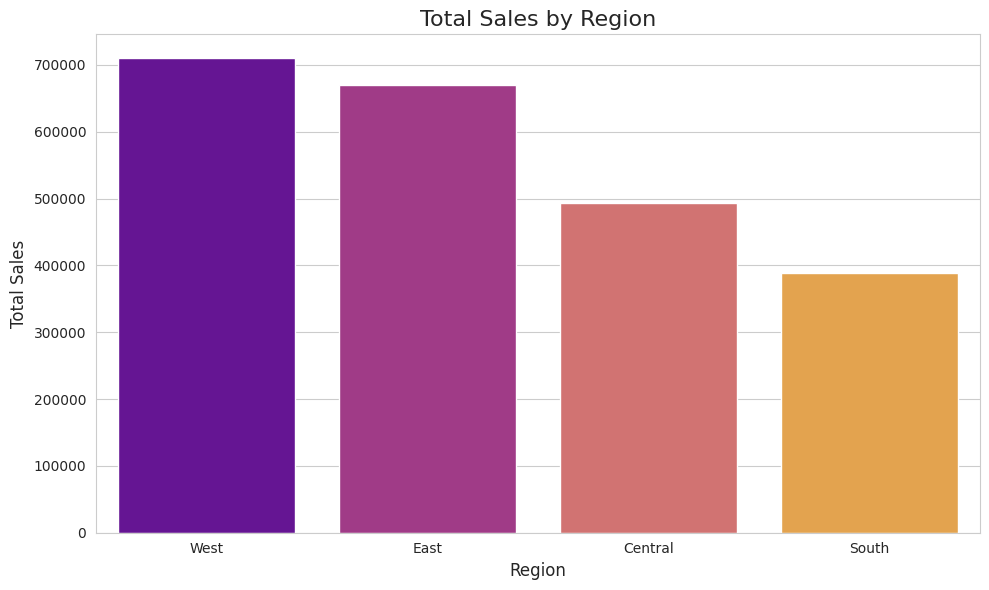


--- Region Analysis Complete ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_region_sales(df: pd.DataFrame):
    """
    Analyzes sales by region, generates a bar chart, and saves the plot.

    Args:
        df (pd.DataFrame): The cleaned DataFrame.
    """
    print("\n--- Analyzing Sales by Region ---")

    # Ensure the DataFrame is valid
    if df is None or 'Region' not in df.columns or 'Sales' not in df.columns:
        print("Error: DataFrame is invalid or required columns ('Region', 'Sales') are missing.")
        return

    # Set a professional plot style
    sns.set_style("whitegrid")

    # Create the figure for the plot
    plt.figure(figsize=(10, 6))

    # --- 1. Analyze Sales by Region ---
    # Group the data by the 'Region' column, sum the 'Sales' for each region,
    # and sort the results in descending order.
    sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

    # --- 2. Visualize the Results ---
    # Create a bar plot using seaborn for a professional look
    sns.barplot(x=sales_by_region.index, y=sales_by_region.values, palette='plasma')

    # --- 3. Add Titles and Labels ---
    plt.title('Total Sales by Region', fontsize=16)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.tight_layout() # Adjust layout to ensure labels fit

    # --- 4. Save and Show the Plot ---
    plt.savefig('sales_by_region.png')
    print("Generated and saved 'sales_by_region.png'")
    plt.show()

    print("\n--- Region Analysis Complete ---")


# This is how you would use this function with your cleaned data.
# Assume 'cleaned_df' is the variable holding your DataFrame from the data cleaning script.
if 'cleaned_df' in locals() and cleaned_df is not None:
    analyze_and_visualize_region_sales(cleaned_df)
else:
    print("Cleaned DataFrame not found. Please run the data cleaning script first.")


--- Analyzing Sales by Product Category ---


/tmp/ipython-input-3681749228.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='viridis')


Generated and saved 'sales_by_category.png'


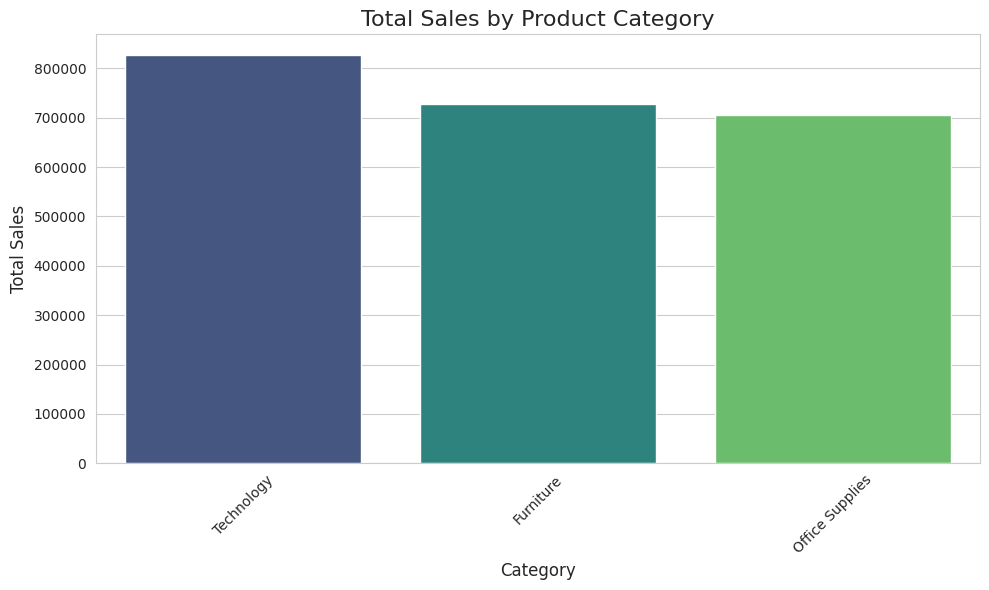


--- Category Analysis Complete ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_category_sales(df: pd.DataFrame):
    """
    Analyzes sales by product category, generates a bar chart, and saves the plot.

    Args:
        df (pd.DataFrame): The cleaned DataFrame.
    """
    print("\n--- Analyzing Sales by Product Category ---")

    # Ensure the DataFrame is valid
    if df is None or 'Category' not in df.columns or 'Sales' not in df.columns:
        print("Error: DataFrame is invalid or required columns ('Category', 'Sales') are missing.")
        return

    # Set a professional plot style
    sns.set_style("whitegrid")

    # Create the figure for the plot
    plt.figure(figsize=(10, 6))

    # --- 1. Analyze Sales by Category ---
    # Group the data by the 'Category' column, sum the 'Sales' for each category,
    # and sort the results in descending order.
    sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

    # --- 2. Visualize the Results ---
    # Create a bar plot using seaborn for a professional look
    sns.barplot(x=sales_by_category.index, y=sales_by_category.values, palette='viridis')

    # --- 3. Add Titles and Labels ---
    plt.title('Total Sales by Product Category', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.xticks(rotation=45) # Rotate category names for better readability
    plt.tight_layout() # Adjust layout to ensure labels fit

    # --- 4. Save and Show the Plot ---
    plt.savefig('sales_by_category.png')
    print("Generated and saved 'sales_by_category.png'")
    plt.show()

    print("\n--- Category Analysis Complete ---")


# This is how you would use this function with your cleaned data.
# Assume 'cleaned_df' is the variable holding your DataFrame from the data cleaning script.
if 'cleaned_df' in locals() and cleaned_df is not None:
    analyze_and_visualize_category_sales(cleaned_df)
else:
    print("Cleaned DataFrame not found. Please run the data cleaning script first.")



--- Analyzing Sales Trend Over Time ---


/tmp/ipython-input-3681552407.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_resampled['Sales'].resample('M').sum()


Generated and saved 'sales_over_time.png'


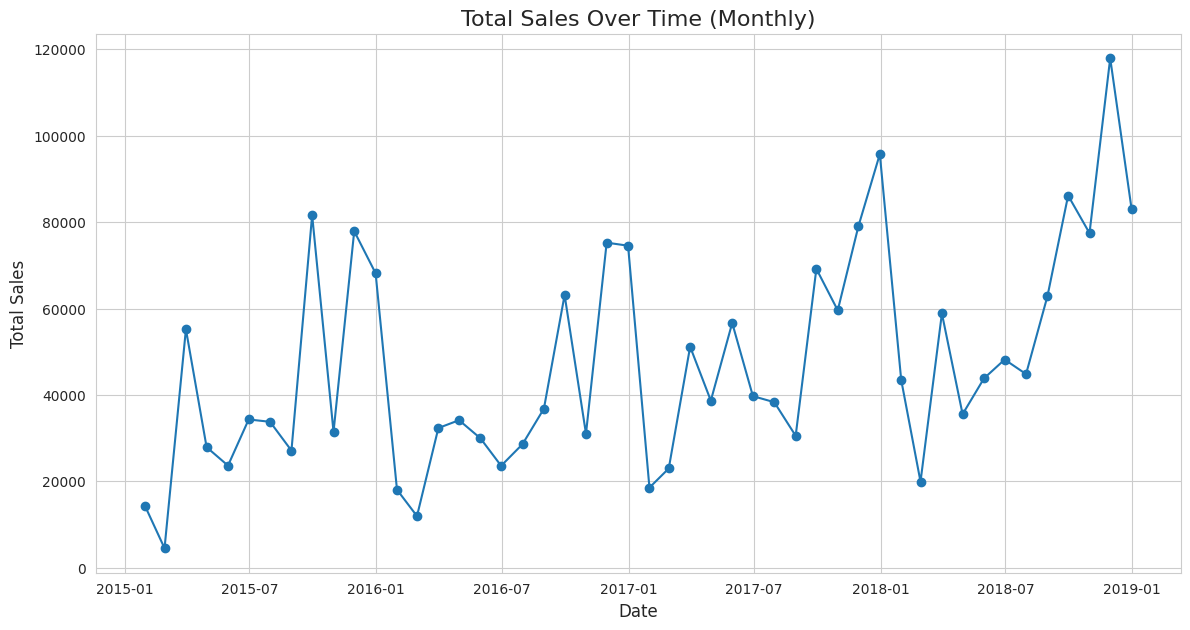


--- Sales Trend Analysis Complete ---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_and_visualize_sales_trend(df: pd.DataFrame):
    """
    Analyzes sales over time, generates a line chart, and saves the plot.

    Args:
        df (pd.DataFrame): The cleaned DataFrame with an 'Order Date' column.
    """
    print("\n--- Analyzing Sales Trend Over Time ---")

    # Ensure the DataFrame is valid
    if df is None or 'Order Date' not in df.columns or 'Sales' not in df.columns:
        print("Error: DataFrame is invalid or required columns ('Order Date', 'Sales') are missing.")
        return

    # Set a professional plot style
    sns.set_style("whitegrid")

    # Create the figure for the plot
    plt.figure(figsize=(14, 7))

    # --- 1. Analyze Sales Over Time ---
    # To get a clear trend, we should resample the data by month and sum the sales.
    # This smooths out daily fluctuations.
    # First, set the 'Order Date' as the index of the DataFrame.
    df_resampled = df.set_index('Order Date')
    # Then, resample by month ('M') and sum the 'Sales'.
    monthly_sales = df_resampled['Sales'].resample('M').sum()

    # --- 2. Visualize the Results ---
    # Create a line plot of the monthly sales data
    plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

    # --- 3. Add Titles and Labels ---
    plt.title('Total Sales Over Time (Monthly)', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.grid(True)

    # --- 4. Save and Show the Plot ---
    plt.savefig('sales_over_time.png')
    print("Generated and saved 'sales_over_time.png'")
    plt.show()

    print("\n--- Sales Trend Analysis Complete ---")


# This is how you would use this function with your cleaned data.
# Assume 'cleaned_df' is the variable holding your DataFrame from the data cleaning script.
if 'cleaned_df' in locals() and cleaned_df is not None:
    analyze_and_visualize_sales_trend(cleaned_df)
else:
    print("Cleaned DataFrame not found. Please run the data cleaning script first.")


--- Starting Sales Forecasting ---
Data prepared for Prophet model.


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4z2h2bbm/bx6zxtrm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4z2h2bbm/bru4kvpr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63701', 'data', 'file=/tmp/tmp4z2h2bbm/bx6zxtrm.json', 'init=/tmp/tmp4z2h2bbm/bru4kvpr.json', 'output', 'file=/tmp/tmp4z2h2bbm/prophet_modeleocn9ii6/prophet_model-20250905171931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:19:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:19:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet model has been trained.
A 12-month forecast has been generated.
Generating forecast plot...
Generated and saved 'sales_forecast_plot.png'


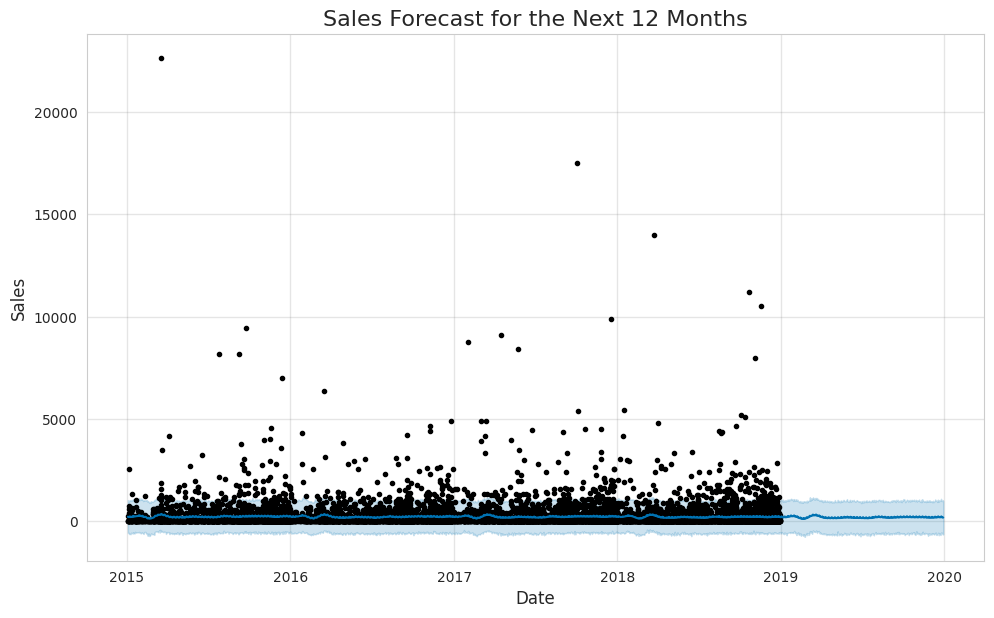


--- Forecast Data Snippet ---
             ds        yhat  yhat_lower   yhat_upper
1590 2019-12-26  246.615712 -528.212227  1027.807663
1591 2019-12-27  200.578721 -591.445996  1006.796361
1592 2019-12-28  213.742917 -564.883253   992.600822
1593 2019-12-29  199.547264 -638.678297  1043.720652
1594 2019-12-30  193.001499 -626.443371  1000.791930

--- Sales Forecasting Complete ---


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

def create_and_run_forecast(df: pd.DataFrame):
    """
    Creates a sales forecast using the Prophet library.

    Args:
        df (pd.DataFrame): The cleaned DataFrame with 'Order Date' and 'Sales' columns.
    """
    print("\n--- Starting Sales Forecasting ---")

    # --- 1. Prepare the data for Prophet ---
    # Prophet requires columns to be named 'ds' (datestamp) and 'y' (value)
    prophet_df = df[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})
    print("Data prepared for Prophet model.")

    # --- 2. Initialize and train the model ---
    # We initialize a new Prophet object. Prophet automatically detects seasonality.
    model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
    model.fit(prophet_df)
    print("Prophet model has been trained.")

    # --- 3. Generate a future forecast ---
    # Create a future dataframe for the next 365 days
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    print("A 12-month forecast has been generated.")

    # --- 4. Visualize the forecast ---
    print("Generating forecast plot...")
    fig = model.plot(forecast)
    plt.title('Sales Forecast for the Next 12 Months', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales', fontsize=12)
    plt.grid(True)
    # Save the plot as an image file
    plt.savefig('sales_forecast_plot.png')
    print("Generated and saved 'sales_forecast_plot.png'")
    plt.show()

    # You can also view the last few rows of the forecast with detailed components
    print("\n--- Forecast Data Snippet ---")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

    print("\n--- Sales Forecasting Complete ---")


# This is how you would use this function with your cleaned data.
# Assume 'cleaned_df' is the variable holding your DataFrame.
if 'cleaned_df' in locals() and cleaned_df is not None:
    create_and_run_forecast(cleaned_df)
else:
    print("Cleaned DataFrame not found. Please run the data cleaning and EDA scripts first.")


In [ ]:
import google.generativeai as genai
from google.colab import userdata

def configure_gemini_api():
    """
    Configures the Google Gemini API using a secret key stored in Google Colab.
    """
    print("--- Configuring Google Gemini API ---")
    try:
        # Get the API key from Colab's secret manager
        api_key = userdata.get('GEMINI_API_KEY')

        # Configure the generative AI model with the key
        genai.configure(api_key=api_key)

        # Corrected: Use the updated model name 'gemini-1.5-flash-latest'
        # The old 'gemini-pro' is often deprecated for the v1beta API.
        model = genai.GenerativeModel('gemini-1.5-flash-latest')
        print("✅ Google Gemini API configured successfully!")

        # Simple test to confirm the API is working
        print("\n--- Performing a quick test... ---")
        response = model.generate_content("Give me a one-sentence description of a project manager.")
        print(f"Test response: {response.text.strip()}")

    except userdata.SecretNotFoundError:
        print("❌ Error: Secret 'GEMINI_API_KEY' not found.")
        print("Please make sure you have added your API key to the Colab Secrets manager with that exact name.")
    except Exception as e:
        print(f"❌ An error occurred: {e}")
        print("Please check your API key and ensure it is valid.")

# --- Run the setup ---
if __name__ == "__main__":
    configure_gemini_api()



--- Configuring Google Gemini API ---
✅ Google Gemini API configured successfully!

--- Performing a quick test... ---
Test response: A project manager orchestrates resources and timelines to successfully deliver a project within scope, budget, and schedule.


--- Configuring Google Gemini API ---
✅ Google Gemini API configured successfully!

--- Please upload your 'train.csv' file ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4z2h2bbm/pirfzb82.json


Saving train.csv to train (1).csv
--- 1. Loading and Cleaning Data ---
Data cleaning complete.

--- 2. Performing Exploratory Data Analysis ---
EDA complete. Key insights extracted.

--- 3. Building Forecasting Model ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4z2h2bbm/r4ojt95m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47406', 'data', 'file=/tmp/tmp4z2h2bbm/pirfzb82.json', 'init=/tmp/tmp4z2h2bbm/r4ojt95m.json', 'output', 'file=/tmp/tmp4z2h2bbm/prophet_modeldfuuhsla/prophet_model-20250905180417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:04:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:04:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast generation complete.


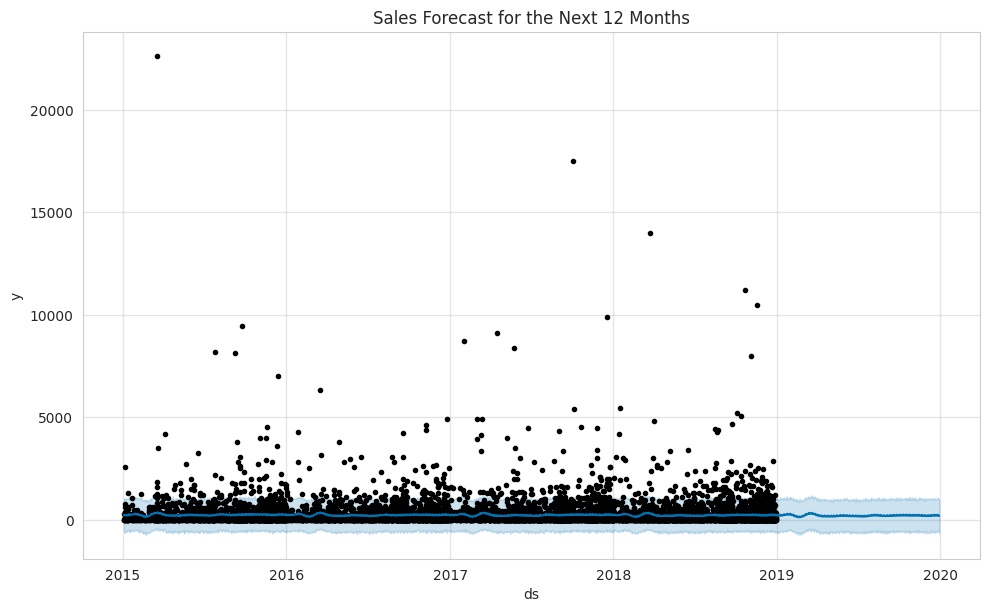


--- 4. Generating AI Insights ---
AI summary generated successfully.

    AI-Generated Business Summary
The sales forecast for the next twelve months projects total revenue of $76,096.78.  This represents a significant year-over-year decline of 87.32%, indicating a substantial downturn requiring immediate strategic review.  Further analysis is needed to understand the underlying causes of this dramatic decrease and identify corrective actions.

Despite the overall negative trend, the Technology product category demonstrated consistent strength, emerging as the top performer.  This suggests a potential opportunity to leverage existing successes in this area to mitigate losses in underperforming sectors.  Focusing marketing and resource allocation towards Technology, and identifying the factors contributing to its success, could be a crucial step in revenue stabilization.

The West region also exceeded expectations as the top-performing sales region. A comparative analysis of sales stra

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import google.generativeai as genai
from google.colab import userdata, files
import io

# --- Pillar 1: Data Cleaning ---
def load_and_clean_data(file_buffer: io.BytesIO, date_column: str) -> pd.DataFrame:
    """Loads and cleans the dataset from an in-memory file buffer."""
    print("--- 1. Loading and Cleaning Data ---")
    try:
        df = pd.read_csv(file_buffer)
    except Exception as e:
        print(f"Error reading the CSV file: {e}")
        return None

    df[date_column] = pd.to_datetime(df[date_column], dayfirst=True, errors='coerce')
    df.dropna(subset=[date_column], inplace=True)
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['int64', 'float64']:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
    print("Data cleaning complete.")
    return df

# --- Pillar 2: Exploratory Data Analysis (EDA) ---
def perform_eda_and_visualize(df: pd.DataFrame) -> tuple:
    """Performs EDA and returns key insights."""
    print("\n--- 2. Performing Exploratory Data Analysis ---")
    sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    print("EDA complete. Key insights extracted.")
    return sales_by_category, sales_by_region

# --- Pillar 3: Forecasting ---
def create_and_run_forecast(df: pd.DataFrame) -> pd.DataFrame:
    """Creates and returns a sales forecast."""
    print("\n--- 3. Building Forecasting Model ---")
    prophet_df = df[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})
    model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    print("Forecast generation complete.")
    fig = model.plot(forecast)
    plt.title('Sales Forecast for the Next 12 Months')
    plt.savefig('sales_forecast_plot.png')
    plt.show()
    return forecast

# --- Pillar 4: Generative AI Insights (Optimized) ---
def get_ai_summary(forecast_df: pd.DataFrame, historical_df: pd.DataFrame, sales_by_category: pd.Series, sales_by_region: pd.Series) -> str:
    """Generates a business summary using the configured GenAI model with improved metrics."""
    print("\n--- 4. Generating AI Insights ---")

    model = genai.GenerativeModel('gemini-1.5-flash-latest')

    last_historical_date = historical_df['Order Date'].max()
    next_year_forecast = forecast_df[forecast_df['ds'] > last_historical_date]
    total_forecasted_sales = next_year_forecast['yhat'].sum()
    last_full_year = last_historical_date.year - 1
    last_year_sales = historical_df[historical_df['Order Date'].dt.year == last_full_year]['Sales'].sum()
    yoy_growth = ((total_forecasted_sales - last_year_sales) / last_year_sales) * 100 if last_year_sales > 0 else 0
    top_category = sales_by_category.index[0]
    top_region = sales_by_region.index[0]

    prompt = f"""
    You are a professional business analyst summarizing a sales report for an executive.
    Your tone should be formal, insightful, and concise.
    Based on the following data, generate a concise 3-paragraph summary:

    Key Performance Indicators:
    - Total Forecasted Sales for the Next 12 Months: ${total_forecasted_sales:,.2f}
    - Predicted Year-over-Year (YoY) Growth: {yoy_growth:.2f}%
    - Top-Performing Product Category: {top_category}
    - Top-Performing Sales Region: {top_region}
    """
    try:
        response = model.generate_content(prompt)
        print("AI summary generated successfully.")
        return response.text
    except Exception as e:
        return f"Error generating content from AI: {e}"

# --- Main Execution Block for Colab Notebook ---

# Step 1: Securely Configure API
print("--- Configuring Google Gemini API ---")
try:
    api_key = userdata.get('GEMINI_API_KEY')
    genai.configure(api_key=api_key)
    print("✅ Google Gemini API configured successfully!")
except Exception as e:
    print(f"❌ Could not configure API. Please check your GEMINI_API_KEY in Colab Secrets. Error: {e}")

# Step 2: Interactive File Upload
print("\n--- Please upload your 'train.csv' file ---")
uploaded = files.upload()
file_name = next(iter(uploaded))

# Step 3: Configuration
DATE_COLUMN_NAME = 'Order Date'

# Step 4: Run the Full Workflow
cleaned_df = load_and_clean_data(file_buffer=io.BytesIO(uploaded[file_name]), date_column=DATE_COLUMN_NAME)

if cleaned_df is not None:
    category_sales, region_sales = perform_eda_and_visualize(cleaned_df)
    forecast = create_and_run_forecast(cleaned_df)
    summary = get_ai_summary(forecast, cleaned_df, category_sales, region_sales)

    print("\n" + "="*50)
    print("    AI-Generated Business Summary")
    print("="*50)
    print(summary)



In [ ]:
!pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.7 MB/s eta 0:00:00


In [6]:
# ==============================================================================
# Cell 1: Install necessary libraries
# ==============================================================================
# In a new Colab cell, run this to install all the required packages.
# The '-q' flag makes the installation quiet.
!pip install streamlit prophet google-generativeai -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 57.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 91.1 MB/s eta 0:00:00


In [7]:
# ==============================================================================
# Cell 2: Import all libraries
# ==============================================================================
# In the next cell, import all the modules you will need.
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import google.generativeai as genai
from google.colab import userdata # For securely accessing API keys
import io

In [8]:
# ==============================================================================
# Cell 3: Define all Helper Functions
# ==============================================================================
# Paste all your function definitions into this single cell.
# This keeps your notebook organized.

def load_and_clean_data(file_buffer: io.BytesIO, date_column: str) -> pd.DataFrame:
    """Loads and cleans the dataset from an in-memory file buffer."""
    df = pd.read_csv(file_buffer)
    df[date_column] = pd.to_datetime(df[date_column], dayfirst=True, errors='coerce')
    df.dropna(subset=[date_column], inplace=True)
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['int64', 'float64']:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
    return df

def perform_eda_and_visualize(df: pd.DataFrame) -> tuple:
    """Performs EDA and returns key insights."""
    sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    return sales_by_category, sales_by_region

def create_and_run_forecast(df: pd.DataFrame) -> tuple:
    """Creates and returns a sales forecast and the model."""
    prophet_df = df[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})
    model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    return model, forecast

def get_ai_summary(forecast_df: pd.DataFrame, historical_df: pd.DataFrame, sales_by_category: pd.Series, sales_by_region: pd.Series) -> str:
    """Generates a business summary using the configured GenAI model."""
    model = genai.GenerativeModel('gemini-1.5-flash-latest')
    last_historical_date = historical_df['Order Date'].max()
    next_year_forecast = forecast_df[forecast_df['ds'] > last_historical_date]
    total_forecasted_sales = next_year_forecast['yhat'].sum()
    last_full_year = last_historical_date.year - 1
    last_year_sales = historical_df[historical_df['Order Date'].dt.year == last_full_year]['Sales'].sum()
    yoy_growth = ((total_forecasted_sales - last_year_sales) / last_year_sales) * 100 if last_year_sales > 0 else 0
    top_category = sales_by_category.index[0]
    top_region = sales_by_region.index[0]
    prompt = f"""
    You are a professional business analyst summarizing a sales report for an executive.
    Based on the following data, generate a concise 3-paragraph summary:
    Key Performance Indicators:
    - Total Forecasted Sales for the Next 12 Months: ${total_forecasted_sales:,.2f}
    - Predicted Year-over-Year (YoY) Growth: {yoy_growth:.2f}%
    - Top-Performing Product Category: {top_category}
    - Top-Performing Sales Region: {top_region}
    """
    response = model.generate_content(prompt)
    return response.text

# --- Confirmation message ---
print("All helper functions defined successfully.")


# ##############################################################################
# ### ATTENTION: CREATE A NEW, EMPTY CODE CELL FOR THE NEXT STEP ###
# #############################################################################

All helper functions defined successfully.


In [9]:
# ==============================================================================
# Cell 4: Write the Streamlit App to a File
# ==============================================================================
# The '%%writefile' command MUST be the very first line in this cell.
# Do not add any spaces or comments before it.

%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import google.generativeai as genai
import io

# --- Helper Functions (pasted again inside the file) ---

def load_and_clean_data(file_buffer: io.BytesIO, date_column: str) -> pd.DataFrame:
    df = pd.read_csv(file_buffer)
    df[date_column] = pd.to_datetime(df[date_column], dayfirst=True, errors='coerce')
    df.dropna(subset=[date_column], inplace=True)
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['int64', 'float64']:
                df[col] = df[col].fillna(df[col].median())
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
    return df

def perform_eda_and_visualize(df: pd.DataFrame) -> tuple:
    sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    sales_by_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
    return sales_by_category, sales_by_region

def create_and_run_forecast(df: pd.DataFrame) -> tuple:
    prophet_df = df[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})
    model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)
    return model, forecast

def get_ai_summary(forecast_df: pd.DataFrame, historical_df: pd.DataFrame, sales_by_category: pd.Series, sales_by_region: pd.Series) -> str:
    model = genai.GenerativeModel('gemini-1.5-flash-latest')
    last_historical_date = historical_df['Order Date'].max()
    next_year_forecast = forecast_df[forecast_df['ds'] > last_historical_date]
    total_forecasted_sales = next_year_forecast['yhat'].sum()
    last_full_year = last_historical_date.year - 1
    last_year_sales = historical_df[historical_df['Order Date'].dt.year == last_full_year]['Sales'].sum()
    yoy_growth = ((total_forecasted_sales - last_year_sales) / last_year_sales) * 100 if last_year_sales > 0 else 0
    top_category = sales_by_category.index[0]
    top_region = sales_by_region.index[0]
    prompt = f"""
    You are a professional business analyst summarizing a sales report for an executive.
    Based on the following data, generate a concise 3-paragraph summary:
    Key Performance Indicators:
    - Total Forecasted Sales for the Next 12 Months: ${total_forecasted_sales:,.2f}
    - Predicted Year-over-Year (YoY) Growth: {yoy_growth:.2f}%
    - Top-Performing Product Category: {top_category}
    - Top-Performing Sales Region: {top_region}
    """
    response = model.generate_content(prompt)
    return response.text

# --- Streamlit App UI ---
st.set_page_config(layout="wide")
st.title("🤖 AI-Powered Sales Forecaster & Insights Engine")
st.markdown("This application analyzes historical sales data, forecasts future trends, and generates a business summary using Generative AI.")

# --- API Key Configuration in Sidebar ---
st.sidebar.header("⚙️ Configuration")
api_key_input = st.sidebar.text_input(
    "Enter your Google Gemini API Key",
    type="password",
    help="Get your free API key from Google AI Studio."
)

st.sidebar.header("1. Upload Your Data")
uploaded_file = st.sidebar.file_uploader("Choose a CSV file", type="csv")

# Only proceed if the API key is provided
if api_key_input:
    try:
        genai.configure(api_key=api_key_input)
        st.sidebar.success("✅ Gemini API Key Loaded Successfully!")
    except Exception as e:
        st.sidebar.error("❌ Invalid API Key. Please check and try again.")

    if uploaded_file is not None:
        with st.spinner('Processing your data... This may take a minute.'):
            cleaned_df = load_and_clean_data(uploaded_file, 'Order Date')
            category_sales, region_sales = perform_eda_and_visualize(cleaned_df)
            prophet_model, forecast = create_and_run_forecast(cleaned_df)
            summary = get_ai_summary(forecast, cleaned_df, category_sales, region_sales)
        st.success("Analysis Complete!")

        st.header("📊 Business Intelligence Dashboard")
        col1, col2 = st.columns(2)
        with col1:
            st.subheader("Sales by Region")
            fig, ax = plt.subplots()
            sns.barplot(x=region_sales.index, y=region_sales.values, ax=ax, palette='plasma')
            plt.xticks(rotation=45)
            st.pyplot(fig)
        with col2:
            st.subheader("Sales by Category")
            fig, ax = plt.subplots()
            sns.barplot(x=category_sales.index, y=category_sales.values, ax=ax, palette='viridis')
            plt.xticks(rotation=45)
            st.pyplot(fig)
        st.header("📈 Sales Forecast for the Next 12 Months")
        fig2 = prophet_model.plot(forecast)
        st.pyplot(fig2)
        st.header("📝 AI-Generated Business Summary")
        st.markdown(summary)
    else:
        st.info("Awaiting for a CSV file to be uploaded.")
else:
    st.warning("Please enter your Google Gemini API Key in the sidebar to begin.")


# ##############################################################################
# ### ATTENTION: CREATE A NEW, EMPTY CODE CELL FOR THE NEXT STEP ###
# ##############################################################################

Writing app.py


In [10]:
# ==============================================================================
# Cell 5: Run the Streamlit App
# ==============================================================================
# Create another new, empty cell.
# Paste the following commands into it.
!streamlit run app.py &>/dev/null&
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://fancy-mammals-shout.loca.lt
^C


In [2]:
!curl ipv4.icanhazip.com

34.74.234.213
